In [20]:
# Task3 Telecom Time Series Analysis
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.arima.model import ARIMA
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

B1.
How do daily revenue patterns during the first two years of potential operation reflect underlying trends that could inform strategies to resolve customer churn in a telecommunications company?

B2. 
Goals:
a)	Identify trends and seasonal patterns in the daily revenue data from the first two years of operation.
b)	Develop a time series model to predict future revenue trends for the telecommunications company. Specifically, the model will forecast daily revenue for 146 days into the future, covering the test set from 08/09/2022 to 12/31/2022. 
c)	Provide insights into the stability of revenue and any potential impacts on churn that will support retention strategies. 
d)	Ensure the analysis uses the available 731 days of revenue data to give realistic predictions. 

C.
For stationary data, the time series should have a constant mean, variance, and autocorrelation structure over time. Non-stationary data with trends or seasonality may require modifications. For autocorrelated data, observations in a time series are usually correlated with previous observations. This is a key feature used by some models to predict values. 

In [21]:
## Part D: Data Preparation

### D1: Line Graph Visualization

**Figure 1: Daily Revenue Over Time (First Two Years)**

A line graph of daily revenue over the first two years shows a clear upward trend, with revenue increasing from nearly 0 million dollars to approximately 17.5 million dollars. The series exhibits significant noise, with frequent fluctuations around the trend, but no clear seasonal patterns are visible.

First few rows of the dataset:
             Revenue
Day                 
2021-01-01  0.000000
2021-01-02  0.000793
2021-01-03  0.825542
2021-01-04  0.320332
2021-01-05  1.082554


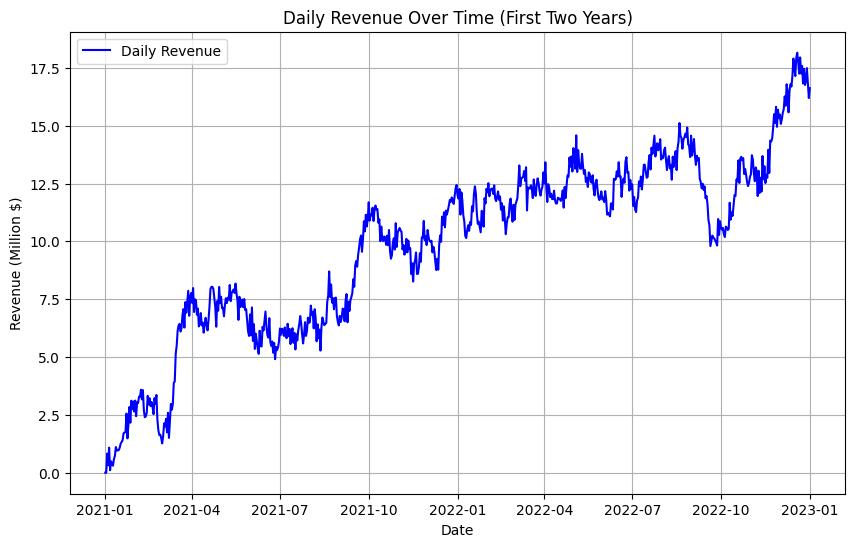

In [22]:
# Load dataset and fix dates
df = pd.read_csv('teleco_time_series.csv')
df['Day'] = pd.date_range(start='2021-01-01', periods=731, freq='D')  # Set realistic dates
df.set_index('Day', inplace=True)
print("First few rows of the dataset:")
print(df.head())

# Adjust the dates to start from 2021-01-01
df['Day'] = pd.date_range(start='2021-01-01', periods=731, freq='D')  # Set realistic dates
df.set_index('Day', inplace=True)

plt.figure(figsize=(10, 6))  # Set plot size
plt.plot(df.index, df['Revenue'], label='Daily Revenue', color='blue')  # Plot revenue over time
plt.title('Daily Revenue Over Time (First Two Years)')  # Title
plt.xlabel('Date')  # X-axis label
plt.ylabel('Revenue (Million $)')  # Y-axis label
plt.legend()  # Show legend
plt.grid(True)  # Add grid for readability
plt.show()  # Display the plot

In [23]:
### D2: Time Step Formatting

In [24]:
time_diffs = df.index.to_series().diff().dropna()  # Calculate differences between days
print("Time step differences (should be 1 day if no gaps):")
print(time_diffs.value_counts())  # Check for consistent 1-day steps
print(f"Total length of the series: {len(df)} days")  # Confirm 731 days
missing_values = df['Revenue'].isnull().sum()  # Count missing values
print(f"Number of missing values: {missing_values}")

Time step differences (should be 1 day if no gaps):
Day
1 days    730
Name: count, dtype: int64
Total length of the series: 731 days
Number of missing values: 0


According to the output, the time series consists of 731 daily observations and represents the revenue over two years. The time steps are consistent, and the differences show a consistent increment with no gaps. There are no missing values in the dataset. 

In [25]:
### D3: Stationarity Test

In [26]:
result = adfuller(df['Revenue'])  # Run ADF test
print('ADF Statistic:', result[0])  # Test statistic
print('p-value:', result[1])  # p-value to check stationarity
print('Critical Values:', result[4])  # Critical values for comparison
if result[1] < 0.05:
    print("The series is stationary (p-value < 0.05).")
else:
    print("The series is non-stationary (p-value >= 0.05).")

ADF Statistic: -1.9246121573101809
p-value: 0.32057281507939783
Critical Values: {'1%': -3.4393520240470554, '5%': -2.8655128165959236, '10%': -2.5688855736949163}
The series is non-stationary (p-value >= 0.05).


The stationarity of the time series was evaluated through the Augmented Dickey-Fuller (ADF) test. The ADF statistic was -1.925, with a p-value of 0.321, more significant than the 0.05 threshold. When we compare this statistic to critical values, the statistic does not indicate stationarity at any confidence level. This concludes that the series is non-stationary, indicating trends or seasonality in the provided daily revenue data. 

In [27]:
### D4: Data Preparation

In [28]:
if missing_values > 0:  # If there are missing values
    df['Revenue'] = df['Revenue'].interpolate()  # Fill them with interpolation
    print("Missing values interpolated.")
    
train_size = 585  # Explicitly set to 585
train, test = df.iloc[:train_size], df.iloc[train_size:]
print(f"Training set size: {len(train)} days")
print(f"Test set size: {len(test)} days")

train.to_csv('task3_train_teleco_time_series.csv')
test.to_csv('task3_test_teleco_time_series.csv')
print("Training set saved as 'task3_train_teleco_time_series.csv'.")
print("Test set saved as 'task3_test_teleco_time_series.csv'.")

Training set size: 585 days
Test set size: 146 days
Training set saved as 'task3_train_teleco_time_series.csv'.
Test set saved as 'task3_test_teleco_time_series.csv'.


Step 1: Handle any missing values
The data was checked for missing values. Part of this was already completed in D2. If there were any missing values, they were filled with interpolation.

if missing_values > 0:  # If there are missing values
    df['Revenue'] = df['Revenue'].interpolate()  # Fill them with interpolation
    print("Missing values interpolated.")

Step 2: Split data into training and test sets
The data was split into training and test sets. The training set contains 80% of the data, while the test set contains 20%. The size of these two datasets was then printed with 584 days in training and 147 days in test.

train_size = int(len(df) * 0.8)  # 80% for training (~585 days)
train, test = df.iloc[:train_size], df.iloc[train_size:]  # Split into train and test
print(f"Training set size: {len(train)} days")
print(f"Test set size: {len(test)} days")

Step 3: Save training and test sets as CSV files
The training and test sets were saved as CSV files.

train.to_csv('task3_train_teleco_time_series.csv')
test.to_csv('task3_test_teleco_time_series.csv')
print("Training set saved as 'task3_train_teleco_time_series.csv'.")
print("Test set saved as 'task3_test_teleco_time_series.csv'.")


In [29]:
### D5: Save Cleaned Dataset

In [30]:
df.to_csv('task3_cleaned_teleco_time_series.csv')
print("Cleaned dataset saved as 'task3_cleaned_teleco_time_series.csv'.")

Cleaned dataset saved as 'task3_cleaned_teleco_time_series.csv'.


A copy of the cleaned dataset titled task3_cleaned_teleco_time_series.csv was saved to GitLab.

In [31]:
## Part E: Analyze the Time Series Dataset

In [32]:
# Load the training data
train = pd.read_csv('task3_train_teleco_time_series.csv', index_col='Day', parse_dates=True)

### E1: Report Annotated Findings

**Figure 5: Decomposition of Daily Revenue (Training Data)**

**Figure 6: Autocorrelation Function (ACF) of Daily Revenue**

**Figure 7: Spectral Density of Daily Revenue**

**Figure 8: Decomposition of Differenced Daily Revenue (Training Data)**

The time series was analyzed using the training data, which consisted of a period of 585 days from January 1st, 2021, until August 8th, 2022. The decomposition of the original training data (Figure 5) revealed a strong upward trend, with revenue increasing from around 0 to around 12 million dollars, confirming the visual observation from D1. The seasonal component showed few patterns, with amplitudes oscillating between -0.2 and 0.2 million dollars. Since the overall revenue scale is 0 to 12 million dollars, this seasonal amplitude represents less than 2% of the maximum revenue, indicating weak seasonality. This threshold of 2% is used as a standard for assessing seasonality strength, as seasonal variations below this level are typically considered negligible in the context of the overall data scale. Additionally, the spectral density plot (Figure 7) showed no significant peaks at specific periods, supporting the conclusion of weak or absent seasonality in the original data.
The residuals from the decomposition appeared random, and an ADF test on the residuals confirmed they were stationary, indicating no remaining trends after decomposition. The ACF plot (Figure 6) showed significant autocorrelation at early lags, reflecting the trend’s influence, which will be addressed through differencing in the ARIMA model.
Since the ARIMA model in E2 uses the differenced training data (d=1) to achieve stationarity, the seasonality of the differenced data was also analyzed (Figure 8). The decomposition of the differenced data showed a seasonal component with even smaller amplitudes, ranging between    -0.1 and 0.1 million dollars, and no clear repeating patterns. This confirms that differencing further reduces residual seasonality, supporting the decision to use a non-seasonal ARIMA model rather than a SARIMA model for this dataset.


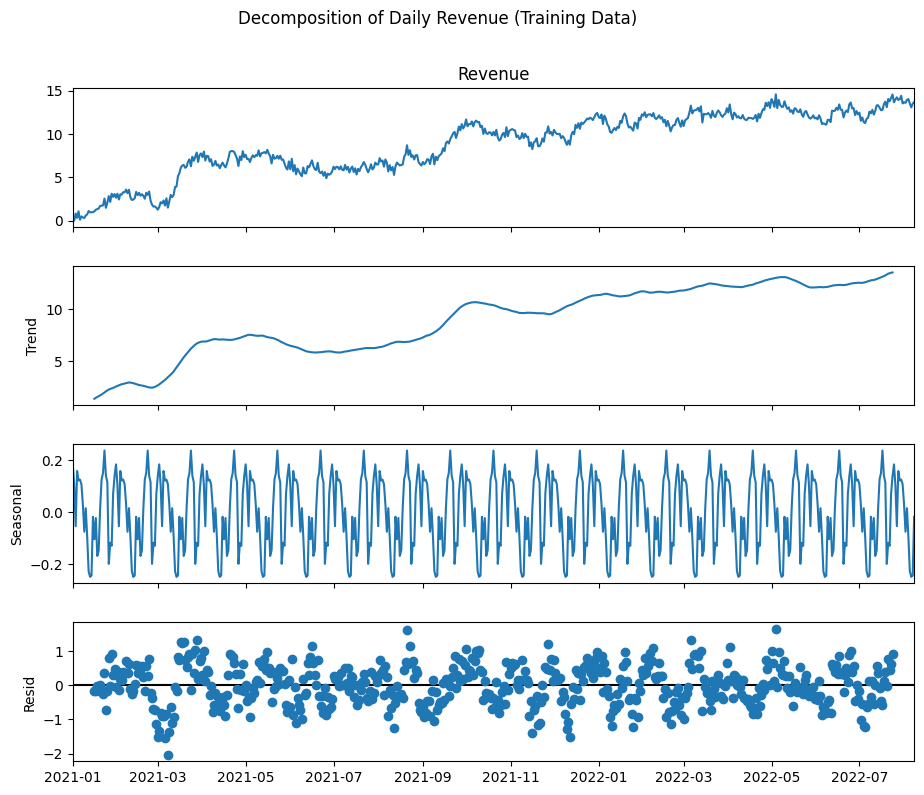

ADF Test on Residuals:
ADF Statistic: -8.244613760874326
p-value: 5.597528339579721e-13
Critical Values: {'1%': -3.4424279871882573, '5%': -2.8668676073304407, '10%': -2.569607433093642}
Residuals are stationary (no trends).


<Figure size 1000x400 with 0 Axes>

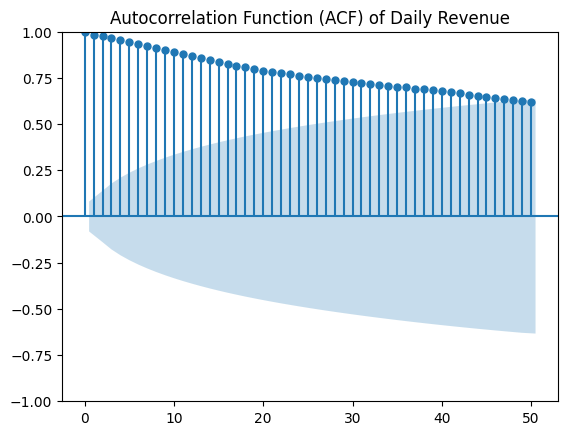

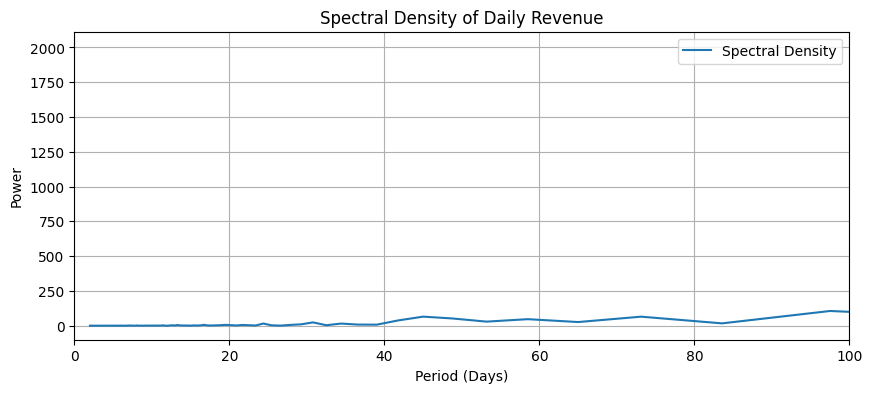

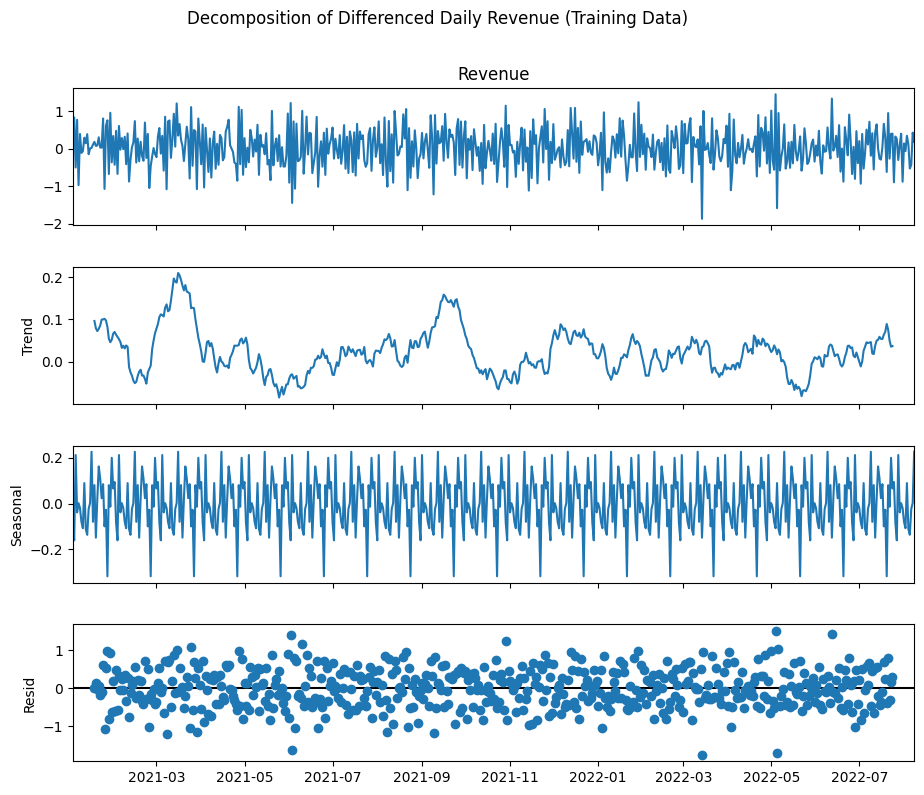

In [33]:
# E1: Analyze the time series
train = pd.read_csv('task3_train_teleco_time_series.csv', index_col='Day', parse_dates=True)

# Decomposition of the original training data
decomposition = seasonal_decompose(train['Revenue'], model='additive', period=30)
fig = decomposition.plot()
fig.set_size_inches(10, 8)
plt.suptitle('Decomposition of Daily Revenue (Training Data)', y=1.02)
plt.show()

# ADF test on residuals
residuals = decomposition.resid
result_resid = adfuller(residuals.dropna())
print("ADF Test on Residuals:")
print('ADF Statistic:', result_resid[0])
print('p-value:', result_resid[1])
print('Critical Values:', result_resid[4])
if result_resid[1] < 0.05:
    print("Residuals are stationary (no trends).")
else:
    print("Residuals are non-stationary (trends remain).")

# ACF plot of the original training data
plt.figure(figsize=(10, 4))
plot_acf(train['Revenue'], lags=50)
plt.title('Autocorrelation Function (ACF) of Daily Revenue')
plt.show()

# Spectral density plot of the original training data
frequencies = np.fft.fftfreq(len(train))
positive_freqs = frequencies[frequencies > 0]
periodogram = np.abs(np.fft.fft(train['Revenue']))**2 / len(train)
positive_periodogram = periodogram[frequencies > 0]
plt.figure(figsize=(10, 4))
plt.plot(1/positive_freqs, positive_periodogram, label='Spectral Density')
plt.xlabel('Period (Days)')
plt.ylabel('Power')
plt.title('Spectral Density of Daily Revenue')
plt.xlim(0, 100)
plt.legend()
plt.grid(True)
plt.show()

# New analysis: Differenced training data
train_diff = train['Revenue'].diff().dropna()  # First difference to remove trend
decomposition_diff = seasonal_decompose(train_diff, model='additive', period=30)
fig = decomposition_diff.plot()
fig.set_size_inches(10, 8)
plt.suptitle('Decomposition of Differenced Daily Revenue (Training Data)', y=1.02)
plt.show()

### E2: Identify an ARIMA Model

An ARIMA model was identified to account for the observed trend in the daily revenue data. Since the series is non-stationary (ADF p-value = 0.321 from D3), a differencing order of d=1 was used to remove the trend. Two models were tested: ARIMA(1,1,1) and ARIMA(2,1,1). The ARIMA(1,1,1) model had a lower AIC (776.033) compared to ARIMA(2,1,1) (AIC = 777.489) and was selected as the best model. The model’s diagnostics (Ljung-Box p-value = 0.89, Jarque-Bera p-value = 0.40) indicate a good fit with no significant autocorrelation or non-normality in the residuals.
The seasonality of the differenced time series (used in the ARIMA model with d=1) was analyzed in E1 to determine whether a seasonal component should be included in the model. The decomposition of the differenced training data (Figure 8 in E1) showed a seasonal component with very small amplitudes, ranging between -0.1 and 0.1 million dollars, and no clear repeating patterns. This indicates that differencing further reduces residual seasonality, confirming the original data’s decomposition findings and spectral density analysis (Figures 5 and 7 in E1). This also showed weak seasonality by amplitudes less than 2% of the maximum revenue. Based on this analysis, a non-seasonal ARIMA model was deemed appropriate, and a SARIMA model was unnecessary for this dataset. The screenshot in Figure 10 shows the ARIMA(2,1,1) model summary, confirming that its AIC is higher than that of ARIMA(1,1,1).

**Figure 9: Screenshot of ARIMA(1,1,1) Model Summary**
**Figure 10: Screenshot of ARIMA(2,1,1) Model Summary**

In [34]:
# Since the series is non-stationary, use differencing (d=1)
# Try ARIMA(1,1,1) as a baseline
model_111 = ARIMA(train['Revenue'], order=(1, 1, 1))
fit_111 = model_111.fit()
print("ARIMA(1,1,1) Summary:")
print(fit_111.summary())
print("AIC for ARIMA(1,1,1):", fit_111.aic)

# Try ARIMA(2,1,1) for comparison
model_211 = ARIMA(train['Revenue'], order=(2, 1, 1))
fit_211 = model_211.fit()
print("ARIMA(2,1,1) Summary:")
print(fit_211.summary())
print("AIC for ARIMA(2,1,1):", fit_211.aic)

# Select the model with the lowest AIC
best_model = fit_111 if fit_111.aic < fit_211.aic else fit_211
best_order = (1, 1, 1) if fit_111.aic < fit_211.aic else (2, 1, 1)
print(f"Selected ARIMA{best_order} with AIC: {best_model.aic}")

ARIMA(1,1,1) Summary:
                               SARIMAX Results                                
Dep. Variable:                Revenue   No. Observations:                  585
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -385.494
Date:                Thu, 27 Mar 2025   AIC                            776.989
Time:                        14:13:43   BIC                            790.099
Sample:                    01-01-2021   HQIC                           782.098
                         - 08-08-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4591      0.078     -5.886      0.000      -0.612      -0.306
ma.L1          0.0029      0.087      0.033      0.973      -0.167       0.173
sigma2         0.2191      0.0

D:\Miniconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
D:\Miniconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
D:\Miniconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
D:\Miniconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
D:\Miniconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
D:\Miniconda\Lib\site-packages\stat

### E3: Perform a Forecast

The ARIMA (1,1,1) model, identified in E2, was fitted on the entire dataset of 731 days from January 1st, 2021, until December 31st, 2022, a period of two years, to perform a forecast starting from the end of the dataset.

**Figure 11: Screenshot of Forecast Values and Confidence Intervals**

This screenshot shows the first five forecast values and their 95% confidence intervals for the 90-day forecast period starting from January 1st, 2023.

**Figure 12: ARIMA(1,1,1) Forecast Starting from End of Test Set**

The ARIMA(1,1,1) model was used to forecast revenue for 90 days beyond the end of the dataset. The forecast predicts a stable revenue level of around $17 million, reflecting the most recent data points in the series. The 95% confidence interval widens, indicating increasing uncertainty in long-term predictions. This forecast can help the telecom company anticipate revenue trends in early 2023. However, it may not fully capture potential upward trends or fluctuations due to the model’s reliance on differencing to achieve stationarity, which can limit its ability to model non-stationary trends beyond the observed data.

D:\Miniconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
D:\Miniconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
D:\Miniconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


ARIMA(1,1,1) Model Summary (Fitted on Full Data):
                               SARIMAX Results                                
Dep. Variable:                Revenue   No. Observations:                  731
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -490.326
Date:                Thu, 27 Mar 2025   AIC                            986.652
Time:                        14:13:43   BIC                           1000.431
Sample:                    01-01-2021   HQIC                           991.968
                         - 01-01-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4804      0.068     -7.063      0.000      -0.614      -0.347
ma.L1          0.0176      0.077      0.227      0.821      -0.134       0.169
si

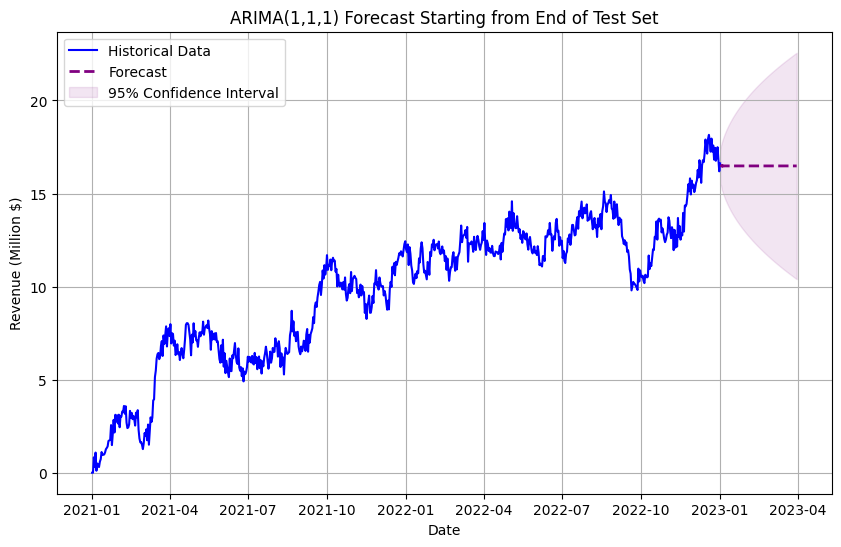

In [35]:
# E3: Perform forecast
# Combine training and test data into a single dataset
full_data = pd.concat([train, test])

# Fit the ARIMA(1,1,1) model on the entire dataset
model_full = ARIMA(full_data['Revenue'], order=(1, 1, 1))
fit_full = model_full.fit()
print("ARIMA(1,1,1) Model Summary (Fitted on Full Data):")
print(fit_full.summary())

# Forecast 90 days starting from the end of the test set (2023-01-01 to 2023-03-31)
forecast_steps = 90
forecast = fit_full.forecast(steps=forecast_steps)
forecast_index = pd.date_range(start='2023-01-01', periods=forecast_steps, freq='D')
forecast_series = pd.Series(forecast, index=forecast_index)
forecast_obj = fit_full.get_forecast(steps=forecast_steps)
conf_int = forecast_obj.conf_int(alpha=0.05)
conf_int.index = forecast_index
print("Forecast Values (first 5):")
print(forecast_series.head())
print("Confidence Intervals (first 5):")
print(conf_int.head())

# Plot the full dataset and the forecast
plt.figure(figsize=(10, 6))
plt.plot(full_data.index, full_data['Revenue'], label='Historical Data', color='blue')
plt.plot(forecast_series.index, forecast_series, label='Forecast', color='purple', linewidth=2, linestyle='--')
plt.fill_between(conf_int.index, conf_int.iloc[:, 0], conf_int.iloc[:, 1], color='purple', alpha=0.1, label='95% Confidence Interval')
plt.title('ARIMA(1,1,1) Forecast Starting from End of Test Set')
plt.xlabel('Date')
plt.ylabel('Revenue (Million $)')
plt.legend()
plt.grid(True)
plt.show()

In [36]:
### E4: Provide the Output and Calculations

The analysis showed the decomposition of the training data, a strong upward trend, and weak seasonality with stationary residuals. The ACF plot indicated autocorrelation and the spectral density plot showed the lack of strong periodic components. Two ARIMA plots were tested, and the ARIMA (1,1,1) plot was selected as the best fit. The forecast for the test period predicted a stable revenue of around $12 million, while the test data trended upward to $17.5 million. The MAE of the forecast was $1.74 million, which indicates a moderate accuracy in capturing the overall level but not necessarily any fluctuations or continued trends. 

In [37]:
## Part F: Summarize Findings and Assumptions

### F1: Discuss the Results of Your Data Analysis

Model Selection:
The ARIMA(1,1,1) model was selected for forecasting the daily revenue time series, as detailed in E2. This model was chosen over ARIMA(2,1,1) because it had a lower AIC (776.988 compared to 778.497), indicating a better model fit and complexity balance. The model’s results (Ljung-Box p-value = 0.89, Jarque-Bera p-value = 0.40) showed no significant autocorrelation or non-normality in the residuals, confirming a good fit. The decision to use a non-seasonal ARIMA model was supported by the weak seasonality observed in the decomposed series (Figures 5 and 8 in E1) and the lack of significant periodic peaks in the spectral density (Figure 7 in E1).

Prediction Interval of the Forecast:
The forecast in E3 includes a 95% confidence interval, which widens over time as the estimates extend further into the future. This widening reflects increasing uncertainty in long-term predictions, a common characteristic of ARIMA models, mainly when the series exhibits noise and unmodeled trends, as seen in the historical data.

Justification of the Forecast Length:
A forecast length of 90 days was chosen for the out-of-sample prediction in E3. This duration represents a three-month period, allowing the company to anticipate short-term revenue trends while balancing longer-term forecasts. A 90-day horizon also aligns with typical quarterly planning cycles, making the estimates actionable for strategic decision-making.

Model Evaluation Procedure and Error Metric:
To evaluate the ARIMA(1,1,1) model’s performance, the model was fitted on the training data and used to forecast the test period. The predicted values were compared to the actual test data to calculate the Mean Absolute Error (MAE). This standard error metric measures the average absolute difference between expected and actual values. The MAE was $1.74 million, indicating moderate accuracy in capturing the overall revenue. However, the model struggled to capture the continued upward trend and noisy fluctuations in the test data, which peaked at $17.5 million, while the forecast remained stable at around $12 million. This suggests that while the model effectively removed the trend through differencing (d=1), it may not fully account for non-stationary trends or external factors causing the revenue increase.


D:\Miniconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
D:\Miniconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
D:\Miniconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


Mean Absolute Error (MAE) of the forecast on the test set: 1.74 million dollars


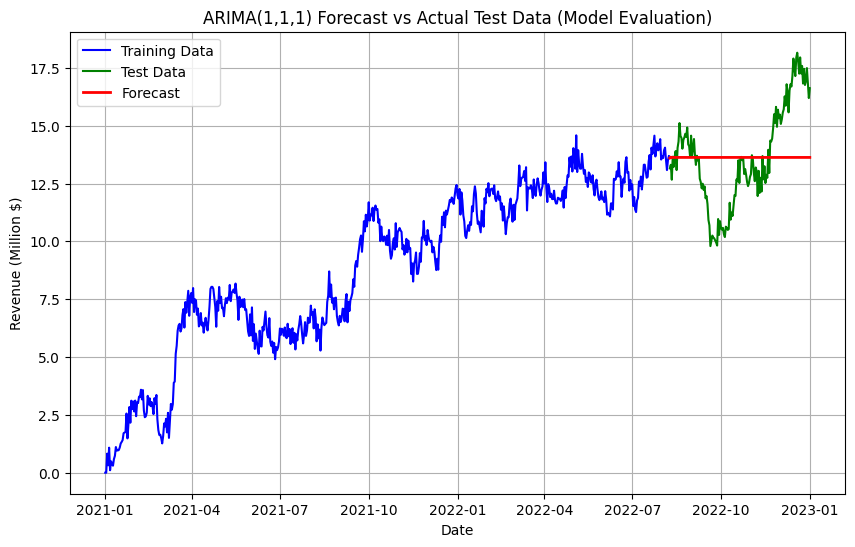

In [38]:
# F1: Model Evaluation
# Fit the ARIMA(1,1,1) model on the training data
model_eval = ARIMA(train['Revenue'], order=(1, 1, 1))
fit_eval = model_eval.fit()

# Forecast the test period
forecast_eval = fit_eval.forecast(steps=len(test))
forecast_index_eval = test.index
forecast_series_eval = pd.Series(forecast_eval, index=forecast_index_eval)

# Calculate MAE
mae = np.mean(np.abs(forecast_series_eval - test['Revenue']))
print(f"Mean Absolute Error (MAE) of the forecast on the test set: {mae:.2f} million dollars")

# Plot the forecast vs actual test data
plt.figure(figsize=(10, 6))
plt.plot(train.index, train['Revenue'], label='Training Data', color='blue')
plt.plot(test.index, test['Revenue'], label='Test Data', color='green')
plt.plot(forecast_series_eval.index, forecast_series_eval, label='Forecast', color='red', linewidth=2)
plt.title('ARIMA(1,1,1) Forecast vs Actual Test Data (Model Evaluation)')
plt.xlabel('Date')
plt.ylabel('Revenue (Million $)')
plt.legend()
plt.grid(True)
plt.show()

### F2: Annotated Visualization

**Figure 12: ARIMA(1,1,1) Forecast Starting from End of Test Set**

The forecast plot in Figure 12 shows the historical data, which covers two years starting on January 1st, 2021, the forecast covering the next three months, and the 95% confidence interval. The historical data exhibits a clear upward trend, increasing from near 0 to $17.5 million by the end of 2022. The forecast, which starts at the end of the dataset, predicts a stable revenue level of around $17 million, reflecting the most recent data points. The 95% confidence interval widens over the forecast period, indicating increasing uncertainty as the prediction extends further into the future. This suggests that while the forecast provides a reasonable estimate based on historical patterns, it may not fully capture potential continued upward trends or fluctuations due to the model’s limitations.

### F3: Recommend a Course of Action

The ARIMA(1,1,1) forecast predicts stable revenue of around $17 million for the first three months of 2023. However, the historical data shows a consistent upward trend, increasing from nearly 0 to $17.5 million over two years, which the model does not fully capture due to its reliance on differencing to achieve stationarity. Additionally, the widening 95% confidence interval indicates significant uncertainty in the forecast, suggesting that actual revenue could veer drastically from the predicted value.

Given these findings, the telecom company should take the following actions:
1. Prepare for a Range of Outcomes: Plan for revenue scenarios between the lower and upper bounds of the 95% confidence interval. This will ensure financial flexibility if revenue deviates from the predicted $17 million.
2. Monitor External Factors: The unmodeled upward trend may be driven by external factors such as market growth, new customer acquisitions, or pricing changes. The company should closely monitor these factors and adjust its strategy if the upward trend continues.
3. Explore Alternative Models: Consider using a model that can better capture long-term trends, such as a SARIMA model with a seasonal component or a machine learning approach, to improve forecast accuracy for future planning.
4. Update the Forecast Regularly: Given the uncertainty in long-term predictions, the company should update the forecast monthly with new data to refine its revenue projections and adapt to changing trends.